# Demo of Robust PCA

In [4]:
import numpy as np
from imageio import imread
import matplotlib.pylab as plt
from RobustPCA.rpca import RobustPCA
from RobustPCA.spcp import StablePCP

In [5]:
'''Helper functions
'''
# function for ploting decomposition results
def plot_LS(data,L,S, clim=None, cmap = 'nipy_spectral'):
    fig, ax = plt.subplots(1,4, figsize=(16,4))
    ax0 = ax[0].imshow(data, cmap=plt.get_cmap(cmap))
    ax[0].set_title("Demo data M", fontsize = 16)
    if clim:
        ax0.set_clim(clim[0], clim[1])   
    ax1 = ax[1].imshow(L, cmap=plt.get_cmap(cmap))
    ax[1].set_title("Low rank matrix L", fontsize = 16)
    if clim:
        ax1.set_clim(clim[0], clim[1])  
    ax2 = ax[2].imshow(S, cmap=plt.get_cmap(cmap))
    ax[2].set_title("Sparse noise S", fontsize = 16)
    if clim:
        ax2.set_clim(clim[0], clim[1]) 
    ax3 = ax[3].imshow(data-L-S, cmap=plt.get_cmap(cmap))
    ax[3].set_title("Residuals: M-L-S", fontsize = 16)
    if clim:
        ax3.set_clim(clim[0], clim[1])

### Toy example
Here a made-up data is used to demostrating robust PCA. The generated synthetic matrix $M$, original low-rank matrix $L$, and sparse noise $S$ are shown below.

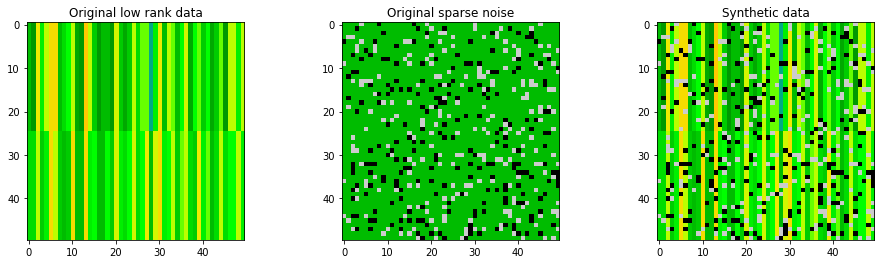

In [6]:
'''generate demo data
'''
np.random.seed(123)

# Low rank data
data_demo_lowrank = np.ones((50,50))*np.random.randint(10, size=(50))
data_demo_lowrank[0:25,:] = data_demo_lowrank[0:25,:]+ \
                            np.ones((25,50))*np.random.randint(low=-4,high=4, size=(50))

# Sparse (noise) data   
data_demo_sparse = - 100*np.random.binomial(1,0.1, size=2500).reshape([50,50])\
                   + 100*np.random.binomial(1,0.1, size=2500).reshape([50,50])
    
# Synthetic data M
data_demo = data_demo_lowrank + data_demo_sparse

# plot matrices
fig, ax = plt.subplots(1,3, figsize=(16,4))
ax1 = ax[0].imshow(data_demo_lowrank, cmap=plt.get_cmap('nipy_spectral'))
ax2 = ax[1].imshow(data_demo_sparse, cmap=plt.get_cmap('nipy_spectral'))
ax3 = ax[2].imshow(data_demo, cmap=plt.get_cmap('nipy_spectral'))
ax1.set_clim([-20,20])
ax2.set_clim([-20,20])
ax3.set_clim([-20,20])
ax[0].set_title('Original low rank data');
ax[1].set_title('Original sparse noise');
ax[2].set_title('Synthetic data');

Here we can decompose $M$ with robust PCA and the result is shown below. Robust PCA did a great job to decompose the low rank matrix and sparse noise matrix.

In [7]:
# Robust PCA
rpca_demo = RobustPCA(tol = 0.000001)
rpca_demo.fit(data_demo)

# extract decomposed matrices
L_demo = rpca_demo.get_low_rank()
S_demo = rpca_demo.get_sparse()

Not converged!
Total error: 0.000002, allowed tolerance: 0.000001


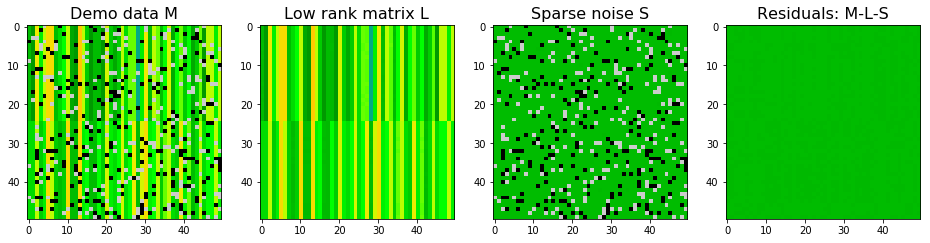

In [8]:
# plot decomposition for demo data
plot_LS(data_demo, L_demo, S_demo, clim=(-20,20))

Here we can decompose $M$ with stable PCP and the result is shown below. Stable PCP also did a great job to decompose the low rank matrix and sparse noise matrix.

In [9]:
# Stable PCP
spcp_demo = StablePCP(tol=0.000001, sigma=0.0001, max_iter=1000)
spcp_demo.fit(data_demo)

# extract decomposed matrices
L_demo = spcp_demo.get_low_rank()
S_demo = spcp_demo.get_sparse()

Converged!


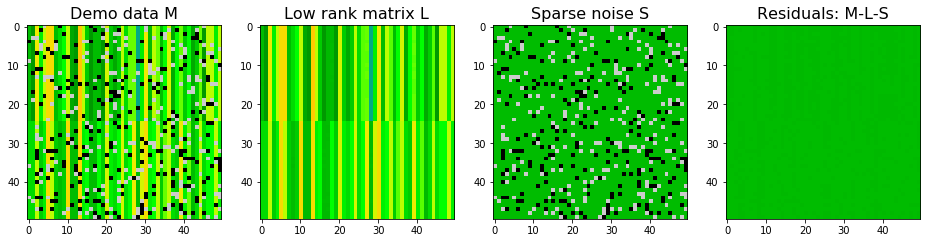

In [10]:
# plot decomposition for demo data
plot_LS(data_demo, L_demo, S_demo, clim=(-20,20))

We can also add some Gaussian noise (dense noise $E$) to the synthetic data and see how two algorithms works. With Gaussian noise, stable PCP seems to give better approximations to true $L$ as shown in the SSE. For $S$, SSE is larger using stable PCP, however, stable PCP seems to be better in identifying sparse pixels. So stable PCP is more stable if there is a dense and non-ignorable noise background. Nevertheless, neither of them return a perfect decomposition. 

Notes:
* In robust PCA, the residual tolerance is a hyperparameter to tune when there is dense noise $E$.
* In stable PCP, the tolerance is not the residual tolerance, so it is better to set to be small. The hyperparameter is `sigma`, the estimated standard variation of the dense noise background.

In [11]:
# Adding Gaussian noise        
data_demo_G = data_demo + np.random.normal(size=(50,50))

Converged!
------------------------
Sum squared errors for low rank matrix: 1036.618285850976
Sum squared errors for Sparse matrix: 1348.731174204974
------------------------


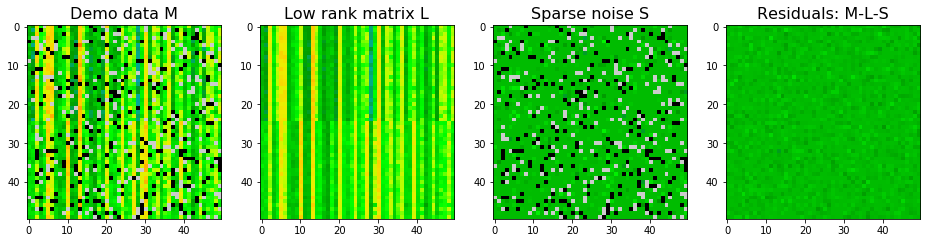

In [12]:
# Robust PCA
rpca_demo = RobustPCA(tol = 1000)
rpca_demo.fit(data_demo_G)
# extract decomposed matrices
L_demo = rpca_demo.get_low_rank()
S_demo = rpca_demo.get_sparse()
# plot decomposition for demo data
plot_LS(data_demo_G, L_demo, S_demo, clim=(-20,20))

print("------------------------")
print("Sum squared errors for low rank matrix:", np.sum((L_demo - data_demo_lowrank)**2))
print("Sum squared errors for Sparse matrix:", np.sum((S_demo - data_demo_sparse)**2))
print("------------------------")

Converged!
------------------------
Sum squared errors for low rank matrix: 1012.517225925545
Sum squared errors for Sparse matrix: 2253.2615466077405
------------------------


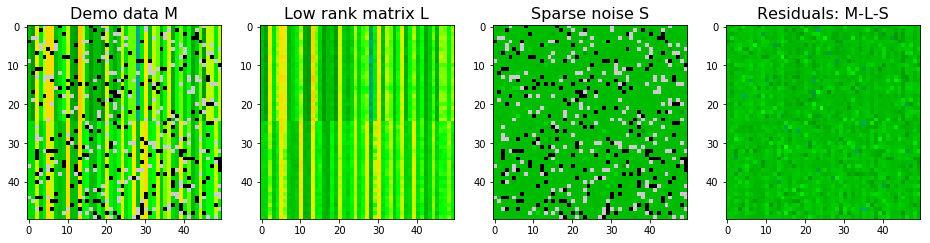

In [13]:
# Stable PCP
spcp_demo = StablePCP(tol=0.00001, sigma=1, max_iter=1000)
spcp_demo.fit(data_demo_G)

# extract decomposed matrices
L_demo = spcp_demo.get_low_rank()
S_demo = spcp_demo.get_sparse()
# plot decomposition for demo data
plot_LS(data_demo, L_demo, S_demo, clim=(-20,20))

print("------------------------")
print("Sum squared errors for low rank matrix:", np.sum((L_demo - data_demo_lowrank)**2))
print("Sum squared errors for Sparse matrix:", np.sum((S_demo - data_demo_sparse)**2))
print("------------------------")

We can also limit the maximum rank for the low rank matrix. It seems stable PCP is silghtly better after limiting the maximum rank to be 2. The rank of $L$ from stabe PCP decomposition without limitation is 12. 

Converged!
------------------------
Sum squared errors for low rank matrix: 895.5860009625869
Sum squared errors for Sparse matrix: 1939.0716317633469
------------------------


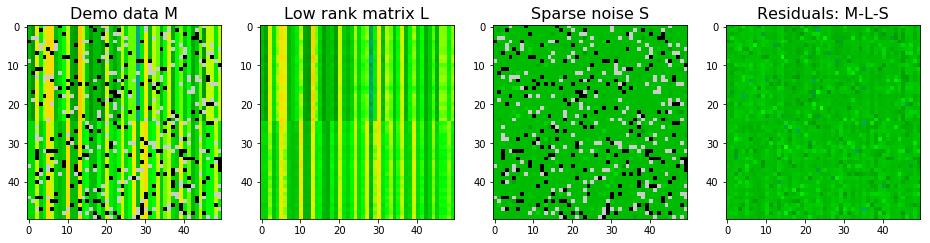

In [14]:
# Stable PCP
spcp_demo = StablePCP(tol=0.00001, sigma=1, max_iter=1000, max_rank=2)
spcp_demo.fit(data_demo_G)

# extract decomposed matrices
L_demo = spcp_demo.get_low_rank()
S_demo = spcp_demo.get_sparse()
# plot decomposition for demo data
plot_LS(data_demo, L_demo, S_demo, clim=(-20,20))

print("------------------------")
print("Sum squared errors for low rank matrix:", np.sum((L_demo - data_demo_lowrank)**2))
print("Sum squared errors for Sparse matrix:", np.sum((S_demo - data_demo_sparse)**2))
print("------------------------")

### Example on an image

In [18]:
from fb import pca

ModuleNotFoundError: No module named 'fb'

In [15]:
# read data
image = imread('./data/image1.jpg')

In [17]:
# robust PCA
rpca = RobustPCA(tol = 1, max_iter=1000, use_fbpca=True)

L_image = image*0
S_image = image*0

for i in range(3):
    rpca.fit(image[:,:,i])
    L_image[:,:,i] = rpca.get_low_rank()
    S_image[:,:,i] = rpca.get_sparse()

NameError: name 'pca' is not defined

Text(0.5,1,'Sparse matrix S')

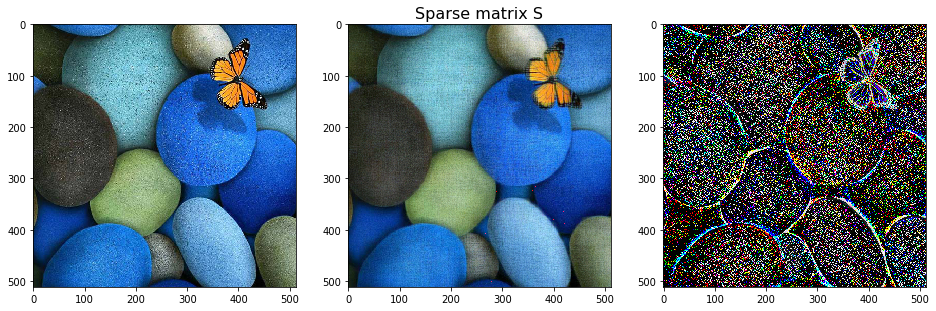

In [265]:
# show results
fig, ax = plt.subplots(1,3,figsize=(16,6))
ax[0].imshow(image)
ax[1].set_title("Original image", fontsize = 16)
ax[1].imshow(L_image)
ax[1].set_title("Low rank matrix L", fontsize = 16)
ax[2].imshow(S_image)
ax[1].set_title("Sparse matrix S", fontsize = 16)

In [262]:
# robust PCA with a max rank
rpca = RobustPCA(tol = 1, max_rank=10, max_iter=1000)

L_image = image*0
S_image = image*0

for i in range(3):
    rpca.fit(image[:,:,i])
    L_image[:,:,i] = rpca.get_low_rank()
    S_image[:,:,i] = rpca.get_sparse()

Not converged!
Total error: 38664.184151, allowed tolerance: 1.000000
Not converged!
Total error: 60738.568103, allowed tolerance: 1.000000
Not converged!
Total error: 14904.953990, allowed tolerance: 1.000000


Text(0.5,1,'Sparse matrix S')

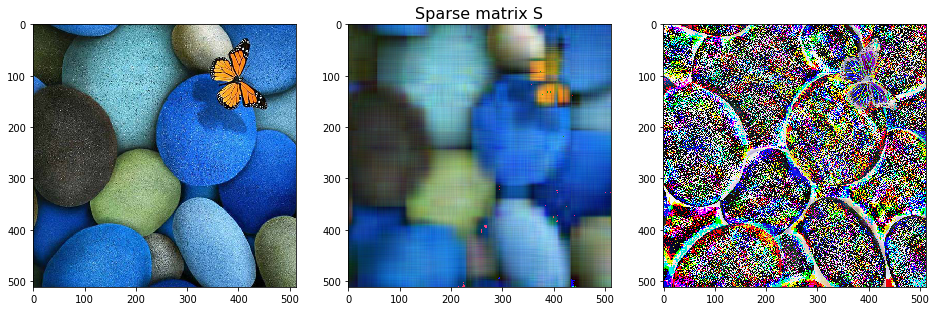

In [263]:
fig, ax = plt.subplots(1,3,figsize=(16,6))
ax[0].imshow(image)
ax[1].set_title("Original image", fontsize = 16)
ax[1].imshow(L_image)
ax[1].set_title("Low rank matrix L", fontsize = 16)
ax[2].imshow(S_image)
ax[1].set_title("Sparse matrix S", fontsize = 16)

### Seperate foreground and background

In [272]:
import skvideo.io  
videodata = skvideo.io.vread("./data/gangnamstyle.mp4")  
print(videodata.shape)

(90, 1080, 1920, 3)


In [273]:
videodata = videodata[:,::2,::2,:].reshape(90, 540*960,3)
videodata.shape

(90, 518400, 3)

In [275]:
# robust PCA
rpca = RobustPCA(max_iter=200)

L_video = videodata*0
S_video = videodata*0

for i in range(3):
    rpca.fit(videodata[:,:,i])
    L_video[:,:,i] = rpca.get_low_rank()
    S_video[:,:,i] = rpca.get_sparse()

Not converged!
Total error: 6121.494911, allowed tolerance: 0.000001
Not converged!
Total error: 5390.150390, allowed tolerance: 0.000001
Not converged!
Total error: 5243.001109, allowed tolerance: 0.000001


In [276]:
# robust PCA
rpca = RobustPCA(max_iter=200, max_rank=1)

L_video_r1 = videodata*0
S_video_r1 = videodata*0

for i in range(3):
    rpca.fit(videodata[:,:,i])
    L_video_r1[:,:,i] = rpca.get_low_rank()
    S_video_r1[:,:,i] = rpca.get_sparse()

Not converged!
Total error: 133.569109, allowed tolerance: 0.000001
Not converged!
Total error: 97.247399, allowed tolerance: 0.000001
Not converged!
Total error: 118.734362, allowed tolerance: 0.000001


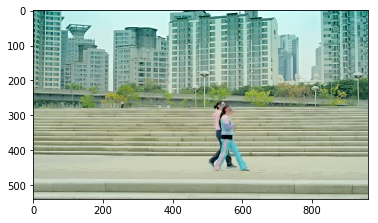

In [278]:
plt.imshow(videodata[0,:,:].reshape(1,540,960,3).squeeze())

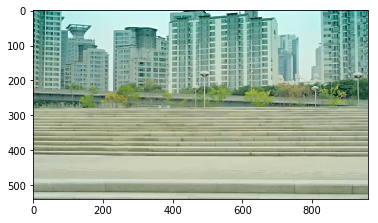

In [279]:
plt.imshow(L_video[0,:,:].reshape(1,540,960,3).squeeze())

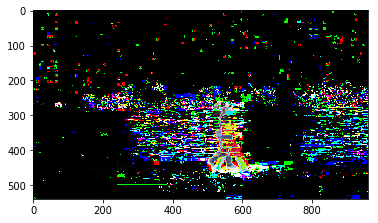

In [290]:
plt.imshow((videodata-L_video_r1)[1,:,:].reshape(1,540,960,3).squeeze())

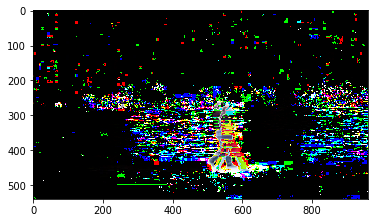

In [282]:
plt.imshow(S_video_r1[0,:,:].reshape(1,540,960,3).squeeze())

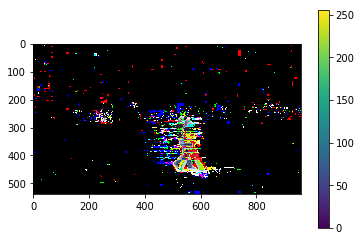

In [284]:
plt.imshow(S_video[0,:,:].reshape(1,540,960,3).squeeze())
plt.colorbar()

In [288]:
np.min(S_video[0,:,:])

0

In [289]:
# robust PCA
spcp = StablePCP(max_iter=200)

L_video_spcp = videodata*0
S_video_spcp = videodata*0

for i in range(3):
    spcp.fit(videodata[:,:,i])
    L_video_spcp[:,:,i] = spcp.get_low_rank()
    S_video_spcp[:,:,i] = spcp.get_sparse()

Not converged within 200 iterations!
Total error: 0.484749, allowed tolerance: 0.000001
Not converged within 200 iterations!
Total error: 0.443124, allowed tolerance: 0.000001
Not converged within 200 iterations!
Total error: 0.658743, allowed tolerance: 0.000001


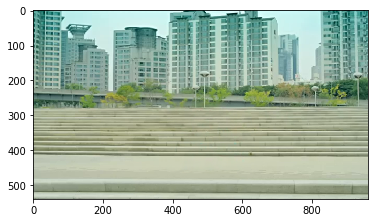

In [291]:
plt.imshow(L_video_spcp[0,:,:].reshape(1,540,960,3).squeeze())

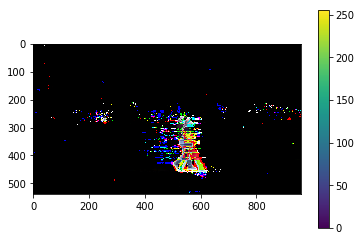

In [292]:
plt.imshow(S_video_spcp[0,:,:].reshape(1,540,960,3).squeeze())
plt.colorbar()

In [ ]:
tmp = S_video_spcp[30,:,:].copy()
tmp[S_video_spcp[30,:,:]>0] = S_video_spcp[30,:,:][S_video_spcp[30,:,:]>0]+L_video_spcp[30,:,:][S_video_spcp[30,:,:]>0]
plt.figure(figsize=(10,10))
plt.imshow(tmp.reshape(540,960,3).squeeze())
plt.colorbar()

In [294]:
videodata.dtype

dtype('uint8')

In [299]:
# robust PCA
videodata=videodata/255.0
rpca2 = RobustPCA(max_iter=1, mu = 0)

L_video = videodata*0
S_video = videodata*0

for i in range(3):
    rpca.fit(videodata[:,:,i])
    L_video[:,:,i] = rpca.get_low_rank()
    S_video[:,:,i] = rpca.get_sparse()

KeyboardInterrupt: 